In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sentence_transformers import SentenceTransformer
from bs4 import BeautifulSoup

/home/paro/Pulpit/machine-learning/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Read jokes data

In [2]:
ratings_data = pd.read_excel('jester-data-1.xls', header=None)
ratings_data = ratings_data.iloc[:, 1:].replace(99, float('nan'))

ratings = ratings_data.mean()

In [3]:
jokes = []

for i in range(1, 101):
    file_name = f'jokes/init{i}.html'
    with open(file_name, 'r') as file:
        joke = file.read()
        soup = BeautifulSoup(joke, 'html.parser')
        joke_text = soup.find('font', size='+1').text.strip()
        jokes.append(joke_text)


# Praepare train and test sets

In [ ]:
model = SentenceTransformer('bert-base-cased')
embeddings = model.encode(jokes)

In [5]:
train_X, test_X, train_Y, test_Y = train_test_split(embeddings, ratings, test_size=0.2, random_state=3)

# MLP Model with default hyperparameters

In [6]:
def MLPRegressorLosses(learning_rate = 0.001, epochs=200):

        mlp = MLPRegressor(solver='sgd', alpha=0.0, learning_rate='constant', learning_rate_init=learning_rate)
        train_loss = []
        test_loss = []

        for epoch in range(epochs):
                mlp.partial_fit(train_X, train_Y)

                pred_train_Y = mlp.predict(train_X)
                train_loss.append(mean_squared_error(train_Y, pred_train_Y))

                pred_test_Y = mlp.predict(test_X)
                test_loss.append(mean_squared_error(test_Y, pred_test_Y))

        loss = mlp.loss_curve_

        return train_loss, test_loss, loss


def plot_losses(train_loss, test_loss, loss):
        plt.plot(range(len(train_loss)), train_loss, label=f'Train Loss')
        plt.plot(range(len(test_loss)), test_loss, label=f'Validation Loss')
        plt.plot(range(len(loss)), loss, label=f'Loss curve')
        plt.legend()
        plt.show()

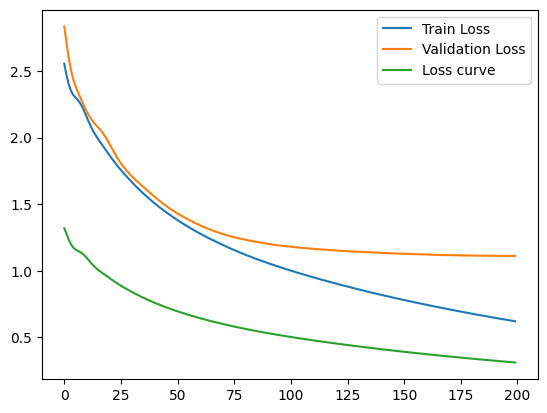

In [7]:
plot_losses(*MLPRegressorLosses())

# Learning rate impact

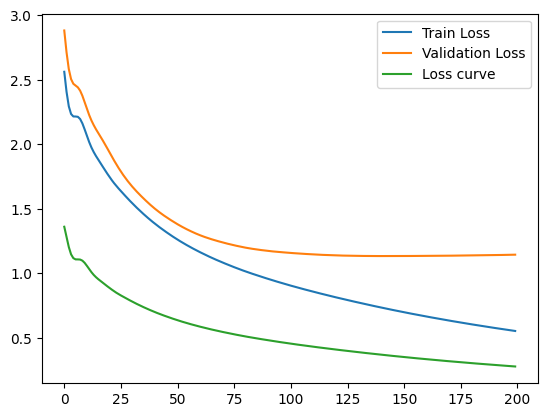

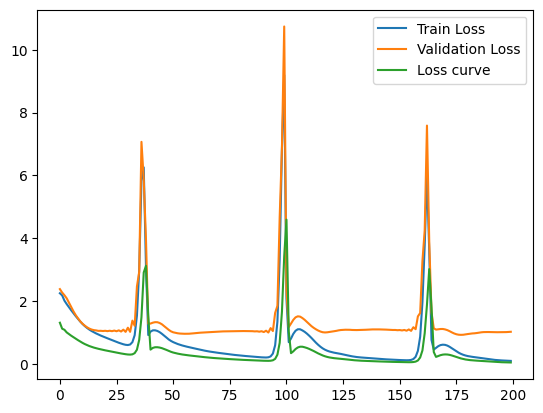

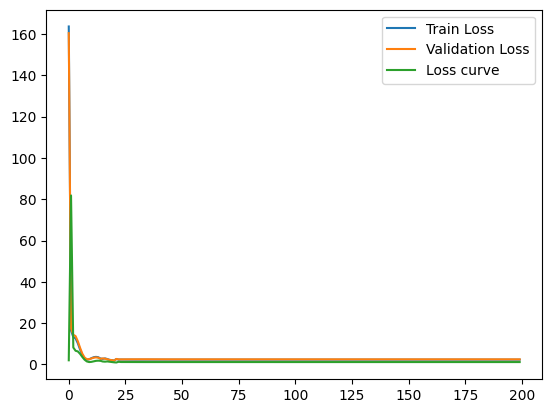

In [16]:
for learning_rate in [0.001, 0.01, 0.1]:
    plot_losses(*MLPRegressorLosses(learning_rate=learning_rate))

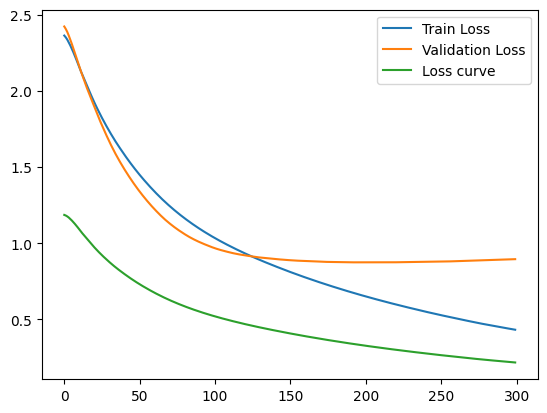

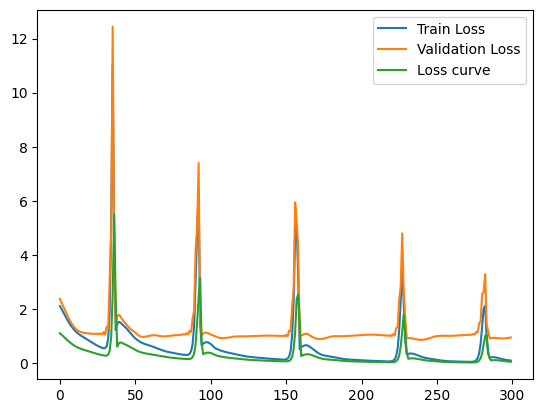

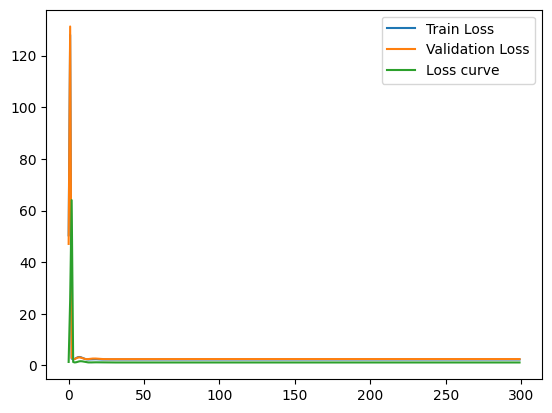

In [18]:
for learning_rate in [0.001, 0.01, 0.1]:
    plot_losses(*MLPRegressorLosses(learning_rate=learning_rate, epochs=300))

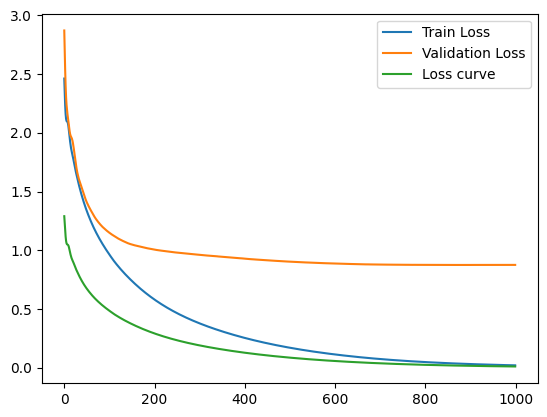

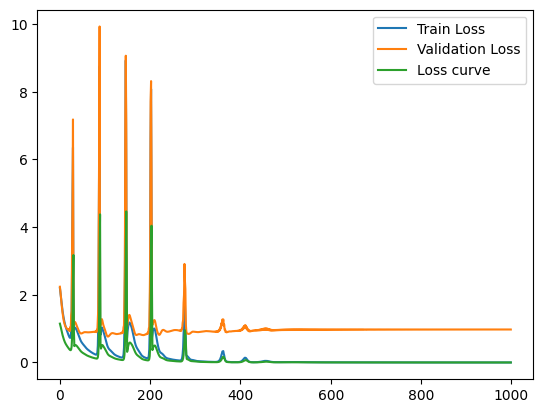

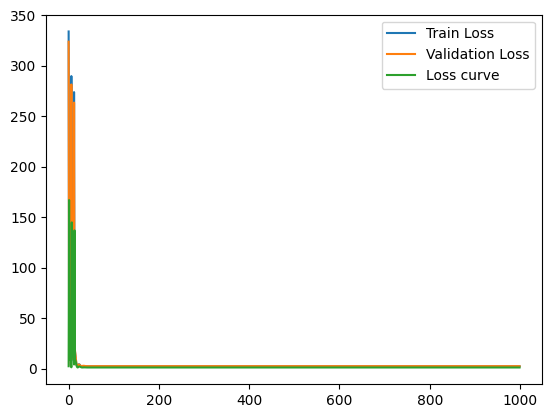

In [19]:
for learning_rate in [0.001, 0.01, 0.1]:
    plot_losses(*MLPRegressorLosses(learning_rate=learning_rate, epochs=1000))